<a href="https://colab.research.google.com/github/philippho01/Fibonacci-Folge/blob/master/%C3%9Cbung3_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erste 5 Zeilen:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week nati

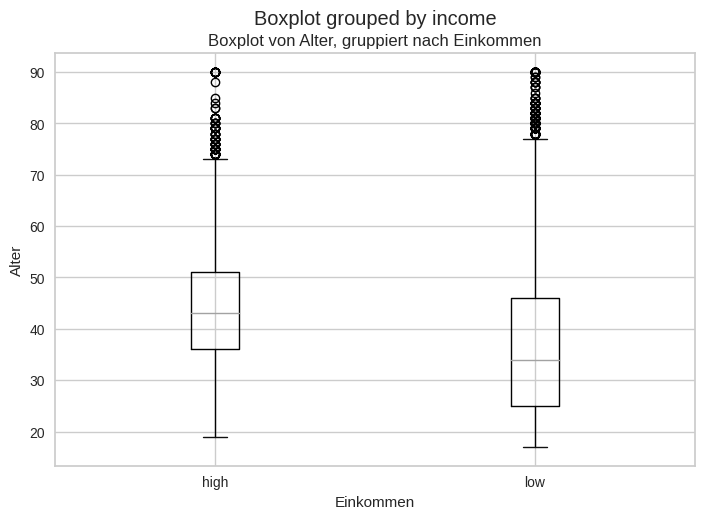

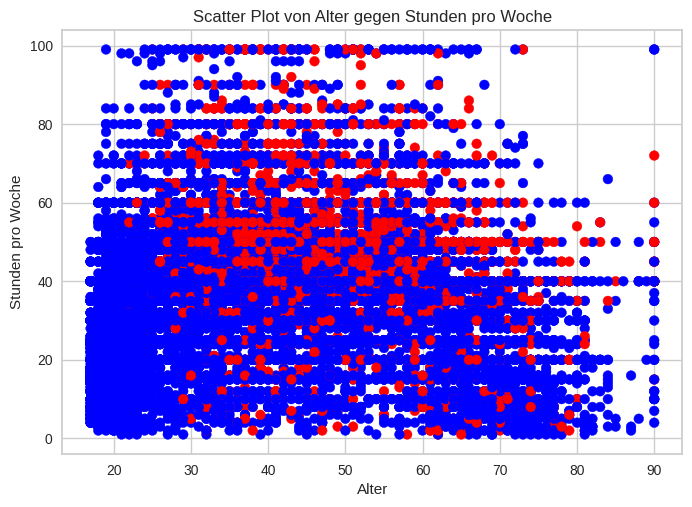

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Übung 1: Daten einlesen und inspizieren
# 1. Daten einlesen
data = pd.read_csv('/content/adult 2.csv')

# 2. Datensatz erkunden
#print("Erste 5 Zeilen:")
#print(data.head())
#print("\nLetzte 5 Zeilen:")
#print(data.tail())

# 3. Zusammenfassung
#print("\nZusammenfassung des DataFrames:")
#print(data.info())

# Übung 2: Auswahl und Filterung
# 1. Spalten auswählen
selected_columns = ['age', 'occupation', 'income']
#print("\nSpalten 'age', 'occupation' und 'income', erste 10 Zeilen:")
#print(data[selected_columns].head(10))

# 2. Bedingte Auswahl
income_above_50k = data[data['income'] == '>50K']
#print("\nDatensätze mit Einkommen über 50K:")
#print(income_above_50k.head())

# 3. Mehrere Bedingungen
bachelors_over_30 = data[(data['age'] > 30) & (data['education'] == 'Bachelors')]
#print("\nDatensätze mit Alter über 30 und Bachelor-Abschluss:")
#print(bachelors_over_30.head())

# Übung 3: Datenbearbeitung
# 1. Neue Spalte hinzufügen
data['age_decade'] = data['age'] // 10
#print("\nDataframe mit neuer Spalte 'age_decade':")
#print(data.head())

# 2. Werte ändern
data['income'] = data['income'].replace({'>50K': 'high', '<=50K': 'low'})
#print("\nDataframe mit geänderten Werten in 'income'-Spalte:")
#print(data['income'].head())

# 3. Zeilen löschen
data = data[data['occupation'] != 'Unknown']
#print("\nDataframe nach Entfernen der Zeilen mit 'Unknown' in 'occupation'-Spalte:")
#print(data.head())

# Übung 4: Einfache Datenanalyse
# 1. Deskriptive Statistiken
#print("\nDeskriptive Statistiken für die 'age'-Spalte:")
#print(data['age'].describe())

# 2. Gruppieren und Aggregieren
income_avg_age = data.groupby('income')['age'].mean()
#print("\nDurchschnittsalter, gruppiert nach Einkommen:")
#print(income_avg_age)

# 3. Einzigartige Werte
unique_educations = data['education'].unique()
#print("\nEinzigartige Werte in der 'education'-Spalte:")
#print(unique_educations)

# Übung 5: Visualisierung
# 1. Boxplot
data.boxplot(column='age', by='income')
plt.title('Boxplot von Alter, gruppiert nach Einkommen')
plt.ylabel('Alter')
plt.xlabel('Einkommen')
plt.show()

# 2. Scatter Plot
plt.scatter(data['age'], data['hours-per-week'], c=data['income'].map({'high': 'red', 'low': 'blue'}))
plt.title('Scatter Plot von Alter gegen Stunden pro Woche')
plt.xlabel('Alter')
plt.ylabel('Stunden pro Woche')
plt.show()